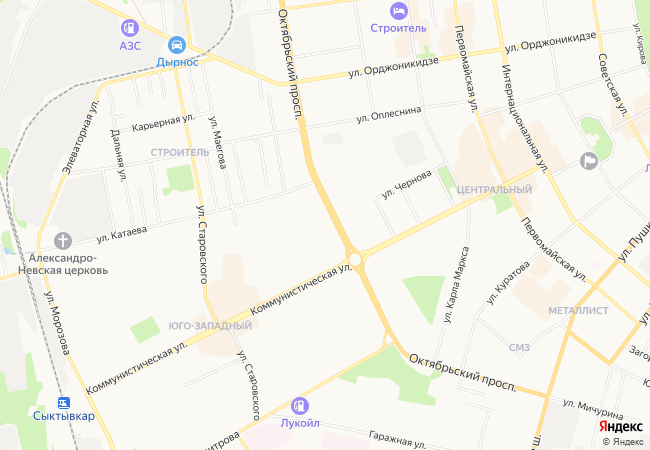

In [7]:
import requests, sys, os, numpy
from IPython.display import Image, display


# Создайте оконное приложение, отображающее карту по координатам и в масштабе, который задаётся программно.
class MapParams(object):
    def __init__(self, data=[]):
        self.dots: numpy.array = data

        #TODO: Убрать значения по умолчанию
        self.lat: float = 61.665279  # Ширина
        self.lon: float = 50.813492  # Долгота

        self.zoom = 14  # Масштаб карты на старте. Изменяется от 1 до 17
        self.type = "map"  # Другие значения "sat", "sat,skl"

        # Разрешение изображения (максимум 650x450)
        self.width = 650
        self.height = 450

    # Преобразование координат в параметр ll, требуется без пробелов, через запятую и без скобок
    def ll_key(self):
        return str(self.lon) + "," + str(self.lat)

    def size_key(self):
        return str(self.width) + "," + str(self.height)

    # Находим центр изображения
    def find_center(self) -> list:
        res = list(numpy.mean(self.dots, axis=0))
        self.lon, self.lat = res
        return res

    def find_borders(self):
        pass


# Создание карты с соответствующими параметрами.
def load_map(mp):
    map_request = "http://static-maps.yandex.ru/1.x/?ll={ll}&z={z}&l={type}&size={sz}".format(ll=mp.ll_key(),
                                                                                              z=mp.zoom, type=mp.type,
                                                                                              sz=mp.size_key())

    response = requests.get(map_request)
    if not response:
        print("Ошибка выполнения запроса:")
        print(map_request)
        print("Http статус:", response.status_code, "(", response.reason, ")")
        sys.exit(1)

    # Запись полученного изображения в файл.
    map_file = "map.png"
    try:
        with open(map_file, "wb") as file:
            file.write(response.content)
    except IOError as ex:
        print("Ошибка записи временного файла:", ex)
        sys.exit(2)
    return map_file


def main():
    mp = MapParams()
    load_map(mp)
    display(Image(filename='map.png'))


if __name__ == "__main__":
    main()